# Import Packages

In [31]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

# Load in Data

In [14]:
avocados = pd.read_csv('C:/Users/lzela/Downloads/avocados.csv')

In [15]:
avocados.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  12/27/2015          1.33      64236.62  1036.74   54454.85   
1           1  12/20/2015          1.35      54876.98   674.28   44638.81   
2           2  12/13/2015          0.93     118220.22   794.70  109149.67   
3           3   12/6/2015          1.08      78992.15  1132.00   71976.41   
4           4  11/29/2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

# Wrangle the Data

## Subsetting (Only Keep): AveragePrice and region

In [16]:
avocados1 = avocados[['AveragePrice', 'region']]

In [19]:
avocados1.head()

AveragePrice  region
0          1.33  Albany
1          1.35  Albany
2          0.93  Albany
3          1.08  Albany
4          1.28  Albany

## Make sure AveragePrice and region is an integer

In [25]:
avocados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   region        18249 non-null  object 
dtypes: float64(1), object(1)
memory usage: 213.9+ KB


In [22]:
avocados.AveragePrice = avocados.AveragePrice.astype(int)

# Test Assumptions

## Normality

C:\Users\lzela\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

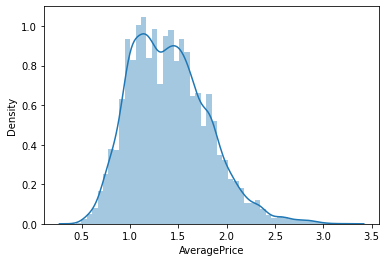

In [26]:
sns.distplot(avocados1['AveragePrice'])

### A bit positively Skewed.  Try a SQRT transformation!

In [39]:
avocados1['avocados1SQRT'] = np.sqrt(avocados1['AveragePrice'])

<ipython-input-39-82545f91d8c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocados1['avocados1SQRT'] = np.sqrt(avocados1['AveragePrice'])


In [28]:
avocados1.head()

AveragePrice  region  avocados1SQRT
0          1.33  Albany       1.153256
1          1.35  Albany       1.161895
2          0.93  Albany       0.964365
3          1.08  Albany       1.039230
4          1.28  Albany       1.131371

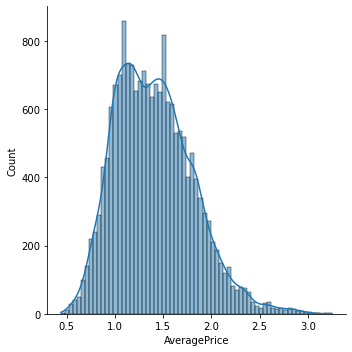

In [50]:
sns.displot(data=avocados1, x="AveragePrice", kde=True)

### Almost perfectly normally distributed, but trying a log transformation just in case

In [48]:
avocados1['avocados1LOG'] = np.log(avocados1['AveragePrice'])

<ipython-input-48-5f556a7deb47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocados1['avocados1LOG'] = np.log(avocados1['AveragePrice'])


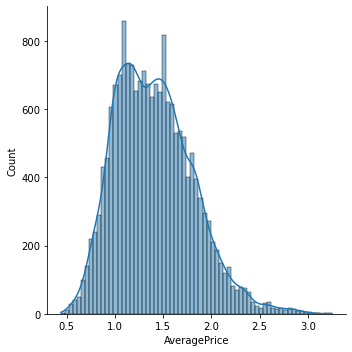

In [51]:
sns.displot(data=avocados1, x="AveragePrice", kde=True)

# Let's settle with this one because it looks pretty much the same. Sticking with log.

## Homogeneity of Variance

In [52]:
scipy.stats.bartlett(avocados1['avocados1LOG'], avocados1['AveragePrice'])

BartlettResult(statistic=1944.3888342949724, pvalue=0.0)

### Does not meet the assumption of homogeneity of variance. Variance is unequal!

# Post Hocs

In [58]:
postHoc = MultiComparison(avocados1['AveragePrice'], avocados1['region'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
             Albany             Atlanta  -0.2231  0.001  -0.337 -0.1091   True
             Albany BaltimoreWashington  -0.0268    0.9 -0.1408  0.0872  False
             Albany               Boise  -0.2129  0.001 -0.3269 -0.0989   True
             Albany              Boston  -0.0301    0.9 -0.1441  0.0838  False
             Albany    BuffaloRochester  -0.0442    0.9 -0.1582  0.0698  False
             Albany          California  -0.1657  0.001 -0.2797 -0.0517   True
             Albany           Charlotte    0.045    0.9  -0.069   0.159  False
             Albany             Chicago  -0.0043    0.9 -0.1182  0.1097  False
             Albany    CincinnatiDayton  -0.3518  0.001 -0.4658 -0.2379   True
             Albany            Columbus  -0.3083  0.

# Conclusions

## Examine Means First

In [60]:
avocados1.groupby('AveragePrice').mean()

avocados1SQRT  avocados1LOG
AveragePrice                             
0.44               0.663325     -0.820981
0.46               0.678233     -0.776529
0.48               0.692820     -0.733969
0.49               0.700000     -0.713350
0.51               0.714143     -0.673345
...                     ...           ...
3.04               1.743560      1.111858
3.05               1.746425      1.115142
3.12               1.766352      1.137833
3.17               1.780449      1.153732
3.25               1.802776      1.178655

[259 rows x 2 columns]

In [ ]:
## There is a massive average price difference between Albany, Houston, and Seattle.